In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
np.random.seed = 12345

In [86]:
def circle(radius,num_pts,std):
    lp = np.linspace(0,2 * np.pi,num_pts+1)[:-1]
    x = np.cos(lp) * radius
    y = np.sin(lp) * radius
    x += np.random.normal(0,std,x.shape[0])
    y += np.random.normal(0,std,x.shape[0])
    
    return x,y
    
    

In [87]:
x1,y1 = circle(1,100,.1)
x2,y2 = circle(3,100,.3)

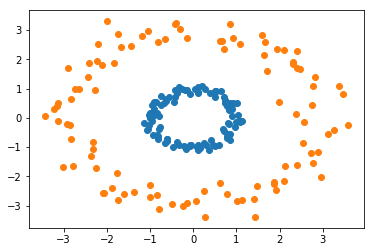

In [88]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

In [89]:
X = np.hstack((x1,x2))
Y = np.hstack((y1,y2))

In [90]:
X = np.vstack((X,Y)).transpose()

In [91]:
X.shape

(200, 2)

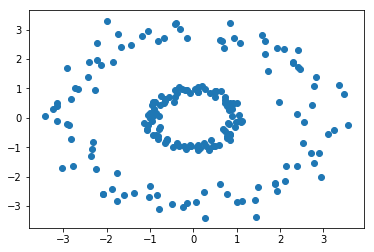

In [92]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## the square euclidean distance between all pairs of points

In [98]:
print(X.shape)
dist = np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    d = ((X[i,:] - X[i+1:,:])**2).sum(axis=1)
    dist[i,i+1:] = d
    dist[i+1:,i] = d

(200, 2)


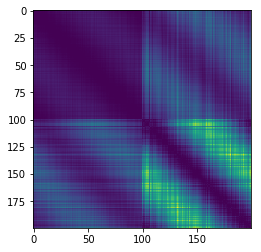

In [99]:
plt.imshow(dist)
plt.show()

In [103]:
var = np.var(np.ma.masked_where(dist==0,dist))
var

85.27156075046865

## radial basis kernel

In [108]:
gamma = 15
K = np.exp(-gamma * dist / (2.0 * var))
K

array([[1.        , 0.99988795, 0.99506821, ..., 0.81964862, 0.64670787,
        0.57063034],
       [0.99988795, 1.        , 0.99416438, ..., 0.8271574 , 0.65524154,
        0.57940345],
       [0.99506821, 0.99416438, 1.        , ..., 0.78054887, 0.59854857,
        0.52597595],
       ...,
       [0.81964862, 0.8271574 , 0.78054887, ..., 1.        , 0.95117326,
        0.91182808],
       [0.64670787, 0.65524154, 0.59854857, ..., 0.95117326, 1.        ,
        0.98888071],
       [0.57063034, 0.57940345, 0.52597595, ..., 0.91182808, 0.98888071,
        1.        ]])

## center the kernal matrix  
  
$\mathbf{C} = \frac{1}{n}\Sigma_{i,j}\mathbf{K}_{i,j}$  
  
$\mathbf{K} \leftarrow \mathbf{K} - \frac{\mathbf{K}\mathbf{e}\mathbf{e}^T}{n} - \frac{\mathbf{e}\mathbf{e}^T\mathbf{K}}{n} + \mathbf{C}\frac{\mathbf{e}\mathbf{e}^T}{n}$  
where  
$\mathbf{e}$ vector of ones of shape $n$

In [118]:
def kernel_center(K):
    n = K.shape[0]
    e = np.ones((n,1))
    eet = np.dot(e,e.transpose())
    C = K.sum()/n
    first_term = np.dot(K,eet) / n
    second_term = np.dot(eet,K) / n
    third_term = np.dot(C,eet/n)
    return K - first_term - second_term + third_term

    

In [119]:
Kc = kernel_center(K)

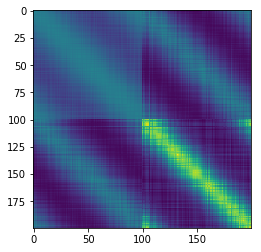

In [120]:
plt.imshow(Kc)
plt.show()